In [ ]:
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes of the data arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


In [ ]:
import numpy as np
from keras.datasets import mnist



# Reshape the data arrays to 1D arrays
X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))

# Print the shapes of the flattened arrays
print('x_train_flat shape:', X_train.shape)
print('x_test_flat shape:', X_test.shape)

In [ ]:
import numpy as np
from scipy.special import expit as sigmoid
from scipy.special import softmax as sm
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from math import sqrt
from math import log

class NeuralNet:
    def __init__(self, num_features, num_samples,num_hidden1,num_hidden2,num_hidden3,num_hidden4,num_hidden5,num_hidden6 ,alpha, max_epochs, num_output, _EPSILON,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6):
        super().__init__()
        self.num_features=num_features  # number of input nodes (features)
        self.no_of_samples=num_samples
        self.num_hidden1=num_hidden1  # number of hidden nodes for 1st hidden layer
        self.num_hidden2=num_hidden2  # number of hidden nodes for 2nd hidden layer
        self.num_hidden3=num_hidden3  # number of hidden nodes for 3rd hidden layer
        self.num_hidden4=num_hidden4  # number of hidden nodes for 4th hidden layer
        self.num_hidden5=num_hidden5  # number of hidden nodes for 5th hidden layer
        self.num_hidden6=num_hidden6  # number of hidden nodes for 6th hidden layer
        self.alpha1=alpha1*np.ones([self.num_hidden1,1])
        self.alpha2=alpha2*np.ones([self.num_hidden2,1])
        self.alpha3=alpha3*np.ones([self.num_hidden3,1])
        self.alpha4=alpha4*np.ones([self.num_hidden4,1])
        self.alpha5=alpha5*np.ones([self.num_hidden5,1])
        self.alpha6=alpha6*np.ones([self.num_hidden6,1])
        self.alpha=alpha  # learning rate
        self.max_epochs=max_epochs # maximum number of epochs
        self.num_output=num_output # number of output nodes
        self._EPSILON=_EPSILON
        self.loss = [] #list to store losses per 100 epochs 
        self.trainingaccur=[] # list to store training accuracy per 100 epochs 
        self.devaccur=[]
        self.Weights_Input_to_H1=np.random.randn(self.num_hidden1, self.num_features)*(0.1)
        self.Bias_Input_to_H1=np.zeros([self.num_hidden1,1])
        self.Weights_H1_to_H2=np.random.randn(self.num_hidden2, self.num_hidden1)*(0.1)
        self.Bias_H1_to_H2=np.zeros([self.num_hidden2,1])
        self.Weights_H2_to_H3=np.random.randn(self.num_hidden3, self.num_hidden2)*(0.1)
        self.Bias_H2_to_H3=np.zeros([self.num_hidden3,1])
        self.Weights_H3_to_H4=np.random.randn(self.num_hidden4, self.num_hidden3)*(0.1)
        self.Bias_H3_to_H4=np.zeros([self.num_hidden4,1])
        self.Weights_H4_to_H5=np.random.randn(self.num_hidden5, self.num_hidden4)*(0.1)
        self.Bias_H4_to_H5=np.zeros([self.num_hidden5,1])
        self.Weights_H5_to_H6=np.random.randn(self.num_hidden6, self.num_hidden5)*(0.1)
        self.Bias_H5_to_H6=np.zeros([self.num_hidden6,1])
        self.Weights_H6_to_output=np.random.randn(self.num_output, self.num_hidden6)*(0.1)
        self.Bias_H6_to_output=np.zeros([self.num_output,1])
        self.dWeights_Input_to_H1=np.zeros([self.num_hidden1, self.num_features])
        self.dBias_Input_to_H1=np.zeros([self.num_hidden1,1])
        self.dWeights_H1_to_H2=np.zeros([self.num_hidden2, self.num_hidden1])
        self.dBias_H1_to_H2=np.zeros([self.num_hidden2,1])
        self.dWeights_H2_to_H3=np.zeros([self.num_hidden3, self.num_hidden2])
        self.dBias_H2_to_H3=np.zeros([self.num_hidden3,1])
        self.dWeights_H3_to_H4=np.zeros([self.num_hidden4, self.num_hidden3])
        self.dBias_H3_to_H4=np.zeros([self.num_hidden4,1])
        self.dWeights_H4_to_H5=np.zeros([self.num_hidden5, self.num_hidden4])
        self.dBias_H4_to_H5=np.zeros([self.num_hidden5,1])
        self.dWeights_H5_to_H6=np.zeros([self.num_hidden6, self.num_hidden5])
        self.dBias_H5_to_H6=np.zeros([self.num_hidden6,1])
        self.dWeights_H6_to_output=np.zeros([self.num_output, self.num_hidden6])
        self.dBias_H6_to_output=np.zeros([self.num_output,1])

        
        

        
    
    def relU(self,X):
        return np.maximum(X,0)

    def leakreLU(self,X,alpha):
        return np.maximum(0, X)+((alpha)*np.minimum(0, X))
      
    
    def deriv(self,X):
        return np.where(X<=0,0,1)

    def deriv_alpha(self,alpha,X):
        return np.where(X<=0,X,0)
    
    def deriv_z(self,X,alpha):
        return np.where(X<=0,alpha,1)  
        


    
    def softmax(self,x):
        return np.exp(x - np.max(x, axis=0)) / np.sum(np.exp(x - np.max(x, axis=0)), axis=0)

    
    

    
        
    # TODO: complete implementation for forward pass
    def forward(self, X):
        self.z1=np.dot((self.Weights_Input_to_H1),(X))+self.Bias_Input_to_H1
        self.a1=self.leakreLU(self.z1,self.alpha1)
        self.z2=np.dot((self.Weights_H1_to_H2),(self.a1))+self.Bias_H1_to_H2
        self.a2=self.leakreLU(self.z2,self.alpha2)
        self.z3=np.dot((self.Weights_H2_to_H3),(self.a2))+self.Bias_H2_to_H3
        self.a3=self.leakreLU(self.z3,self.alpha3)
        self.z4=np.dot((self.Weights_H3_to_H4),(self.a3))+self.Bias_H3_to_H4
        self.a4=self.leakreLU(self.z4,self.alpha4)
        self.z5=np.dot((self.Weights_H4_to_H5),(self.a4))+self.Bias_H4_to_H5
        self.a5=self.leakreLU(self.z5,self.alpha5)
        self.z6=np.dot((self.Weights_H5_to_H6),(self.a5))+self.Bias_H5_to_H6
        self.a6=self.leakreLU(self.z6,self.alpha6)
        self.z7=np.dot((self.Weights_H6_to_output),(self.a6))+self.Bias_H6_to_output
        self.a7=self.softmax((self.z7))
        return self.a7
        
        
        
    
    # TODO: complete implementation for backpropagation
    # the following Numpy functions may be useful: np.dot, np.sum, np.tanh, numpy.ndarray.T
    def backprop(self, X, t):

        self.dz7=(self.a7.reshape(self.num_output,-1)-t.reshape(self.num_output,-1))/((X.shape[1]))
        self.dBias_H6_to_output=np.sum(self.dz7,axis=1,keepdims=True)
        self.dWeights_H6_to_output=np.dot((self.dz7),self.a6.T)
        self.dz6=np.dot(self.Weights_H6_to_output.T,self.dz7)* (self.deriv_z(self.z6,self.alpha6))
        self.dBias_H5_to_H6=np.sum(self.dz6,axis=1,keepdims=True)
        self.dWeights_H5_to_H6=np.dot((self.dz6),(self.a5.T))
        self.dalpha6=np.sum(((np.dot(self.Weights_H6_to_output.T,self.dz7)) * (self.deriv_alpha(self.alpha6,self.z6))),axis=1,keepdims=True)
        self.dz5=(np.dot(self.Weights_H5_to_H6.T,self.dz6)) * (self.deriv_z(self.z5,self.alpha5))
        self.dBias_H4_to_H5=np.sum(self.dz5,axis=1,keepdims=True)
        self.dWeights_H4_to_H5=np.dot((self.dz5),(self.a4.T))
        self.dalpha5=np.sum(((np.dot(self.Weights_H5_to_H6.T,self.dz6)) * (self.deriv_alpha(self.alpha5,self.z5))),axis=1,keepdims=True)
        self.dz4=(np.dot(self.Weights_H4_to_H5.T,self.dz5)) * (self.deriv_z(self.z4,self.alpha4))
        self.dBias_H3_to_H4=np.sum(self.dz4,axis=1,keepdims=True)
        self.dWeights_H3_to_H4=np.dot((self.dz4),(self.a3.T))
        self.dalpha4=np.sum(((np.dot(self.Weights_H4_to_H5.T,self.dz5)) * (self.deriv_alpha(self.alpha4,self.z4))),axis=1,keepdims=True)
        self.dz3=(np.dot(self.Weights_H4_to_H5.T,self.dz4)) * (self.deriv_z(self.z3,self.alpha3))
        self.dBias_H2_to_H3=np.sum(self.dz3,axis=1,keepdims=True)
        self.dWeights_H2_to_H3=np.dot((self.dz3),(self.a2.T))
        self.dalpha3=np.sum(((np.dot(self.Weights_H3_to_H4.T,self.dz4)) * (self.deriv_alpha(self.alpha3,self.z3))),axis=1,keepdims=True)
        self.dz2=(np.dot(self.Weights_H3_to_H4.T,self.dz3)) * (self.deriv_z(self.z2,self.alpha2))
        self.dBias_H1_to_H2=np.sum(self.dz2,axis=1,keepdims=True)
        self.dWeights_H1_to_H2=np.dot((self.dz2),(self.a1.T))
        self.dalpha2=np.sum(((np.dot(self.Weights_H2_to_H3.T,self.dz3)) * (self.deriv_alpha(self.alpha2,self.z2))),axis=1,keepdims=True)
        self.dz1=(np.dot(self.Weights_H1_to_H2.T,self.dz2)) * (self.deriv_z(self.z1,self.alpha1))
        self.dBias_Input_to_H1=np.sum(self.dz1,axis=1,keepdims=True)
        self.dWeights_Input_to_H1=np.dot((self.dz1),X.T)
        self.dalpha1=np.sum(((np.dot(self.Weights_H1_to_H2.T,self.dz2)) * (self.deriv_alpha(self.alpha1,self.z1))),axis=1,keepdims=True)
        
        
        
        
        
            
                
                
                
              
                        
                
      
        
        
    
    #TODO: complete implementation for fitting data, and change the existing code if needed
    def fit(self, x_train_data, y_train_data,x_dev_data,y_dev_data):
       
        
        
        for step in range(self.max_epochs):
            self.forward(x_train_data)
            self.backprop(x_train_data, y_train_data)
            self.Bias_H6_to_output=self.Bias_H6_to_output-((self.alpha)*(self.dBias_H6_to_output))
            self.Weights_H6_to_output=self.Weights_H6_to_output-((self.alpha)*(self.dWeights_H6_to_output))
            self.Bias_H5_to_H6=self.Bias_H5_to_H6-((self.alpha)*(self.dBias_H5_to_H6))
            self.Weights_H5_to_H6=self.Weights_H5_to_H6-((self.alpha)*(self.dWeights_H5_to_H6))
            self.Bias_H4_to_H5=self.Bias_H4_to_H5-((self.alpha)*(self.dBias_H4_to_H5))
            self.Weights_H4_to_H5=self.Weights_H4_to_H5-((self.alpha)*(self.dWeights_H4_to_H5))
            self.Bias_H3_to_H4=self.Bias_H3_to_H4-((self.alpha)*(self.dBias_H3_to_H4))
            self.Weights_H3_to_H4=self.Weights_H3_to_H4-((self.alpha)*(self.dWeights_H3_to_H4))
            self.Bias_H2_to_H3=self.Bias_H2_to_H3-((self.alpha)*(self.dBias_H2_to_H3))
            self.Weights_H2_to_H3=self.Weights_H2_to_H3-((self.alpha)*(self.dWeights_H2_to_H3))
            self.Bias_H1_to_H2=self.Bias_H1_to_H2-((self.alpha)*(self.dBias_H1_to_H2))
            self.Weights_H1_to_H2=self.Weights_H1_to_H2-((self.alpha)*(self.dWeights_H1_to_H2))
            self.Bias_Input_to_H1=self.Bias_Input_to_H1-((self.alpha)*(self.dBias_Input_to_H1))
            self.Weights_Input_to_H1=self.Weights_Input_to_H1-((self.alpha)*(self.dWeights_Input_to_H1))
            self.alpha1=self.alpha1-((self.alpha)*(self.dalpha1))
            self.alpha2=self.alpha2-((self.alpha)*(self.dalpha2))
            self.alpha3=self.alpha3-((self.alpha)*(self.dalpha3))
            self.alpha4=self.alpha4-((self.alpha)*(self.dalpha4))
            self.alpha5=self.alpha5-((self.alpha)*(self.dalpha5))
            self.alpha6=self.alpha6-((self.alpha)*(self.dalpha6))
            print(step)
            
      

            if step % 100 == 0:
                self.CCloss=log_loss(np.transpose(y_train_data),np.transpose(self.a7),eps=self._EPSILON,normalize=True)
                self.trainingaccuracy=accuracy_score(np.argmax(y_train_data,axis=0),np.argmax(self.forward(x_train_data),axis=0))
                self.devaccuracy=accuracy_score(np.argmax(y_dev_data,axis=0),np.argmax(self.forward(x_dev_data),axis=0))
                print(f'step: {step},  loss: {self.CCloss:3.150f}') 
                print(accuracy_score(np.argmax(y_train_data,axis=0),np.argmax(self.forward(x_train_data),axis=0)))
                print(accuracy_score(np.argmax(y_dev_data,axis=0),np.argmax(self.forward(x_dev_data),axis=0)))
                self.loss.append(self.CCloss)
                self.trainingaccur.append(self.trainingaccuracy)
                self.devaccur.append(self.devaccuracy)
                print(NN.alpha1,NN.dalpha1)
                print(NN.alpha2,NN.dalpha2)
                print(NN.alpha3,NN.dalpha3)
                print(NN.alpha4,NN.dalpha4)
                print(NN.alpha5,NN.dalpha5)
                print(NN.alpha6,NN.dalpha6)
               
                
            

                
              
            
            
    def predict(self,X,y=None):
        self.forward(X)
        if(self.num_output>1):
            y_hat=np.argmax(self.a7, axis=0)
            temp=accuracy_score(y_hat,y)
        else:
            y_hat=np.where(self.a7>0.5,1,0)
            temp=accuracy_score(y_hat,y)
        return temp,y_hat

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


# import some data to play with
mnist = load_digits()
X=mnist.data
Y=mnist.target

In [ ]:
X.shape,Y.shape

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, Y_train, test_size=0.11)


In [ ]:
import sklearn as sk
scaler=sk.preprocessing.MinMaxScaler()

In [ ]:
for a in range(X_train.shape[0]):
  X_train[a,:]=scaler.fit_transform(X_train[a,:].reshape(-1, 1)).flatten()

In [ ]:
y_train=np.array(pd.get_dummies(np.array(y_train)))
y_test=np.array(pd.get_dummies(np.array(y_test)))

In [ ]:
X_train=np.transpose(X_train)
X_test=np.transpose(X_test)

In [ ]:
y_train=np.transpose(y_train)
y_test=np.transpose(y_test)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
numHidden1 = 200 # number of hidden nodes
numHidden2 = 200# number of hidden nodes
numHidden3 = 200# number of hidden nodes
numHidden4 = 200# number of hidden nodes
numHidden5 = 200# number of hidden nodes
numHidden6 = 200# number of hidden nodes
num_features = X_train.shape[0]
num_samples=X_train.shape[1]
numOutput = y_train.shape[0]
max_epoches = 1000000
alpha = 0.01
epsilon=0.00000000001
alpha1=0.001
alpha2=0.001
alpha3=0.001
alpha4=0.001
alpha5=0.001
alpha6=0.001
NN = NeuralNet(num_features,num_samples, numHidden1,numHidden2,numHidden3,numHidden4,numHidden5,numHidden6, alpha, max_epoches, numOutput,epsilon,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6)

In [ ]:
NN.fit(X_train,y_train,X_test,y_test)

0
step: 0,  loss: 1.378981429229188648832860053516924381256103515625000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0.50685
0.8636
[[ 0.02256129]
 [-0.03520883]
 [-0.00089104]
 [-0.06469783]
 [-0.04140627]
 [ 0.03623438]
 [-0.04887624]
 [ 0.01244623]
 [ 0.02981708]
 [-0.01067898]
 [-0.00989902]
 [ 0.03864027]
 [ 0.01727445]
 [ 0.03069467]
 [ 0.00238599]
 [-0.00691268]
 [-0.0601018 ]
 [ 0.02994788]
 [-0.01928129]
 [ 0.00577692]
 [ 0.02056933]
 [-0.03814161]
 [-0.00357963]
 [ 0.02487191]
 [-0.02598088]
 [-0.00587427]
 [ 0.02797886]
 [ 0.02018368]
 [-0.02026772]
 [-0.05371071]
 [ 0.00086731]
 [-0.06270834]
 [ 0.05147461]
 [-0.02573376]
 [ 0.01070768]
 [-0.00318786]
 [ 0.00912742]
 [ 0.01493118]
 [-0.04334396]
 [ 0.02217373]
 [ 0.02933062]
 [ 0.03557997]
 [-0.00620404]
 [ 0.0024874 ]
 [ 0.03322316]
 [ 0.01087666]
 [-0.07082818]
 [-0.00711857]
 [ 0.04089941]
 [ 0.01301527]
 [-0.03620322]
 [ 0.00173479]
 [ 0.01885184]
 [ 0.00376768]
 [-0

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [ ]:
NN.alpha=0.01

In [ ]:
NN.alpha

In [ ]:
NN.__dict__

In [ ]:
for key, value in NN.__dict__.items():
    if hasattr(value, 'shape'):
        print(f"The shape of {key} is: {value.shape}")
    else:
        print(f"{key} does not have a 'shape' attribute and has value: {(value)}")

In [ ]:
np.mean(NN.dz7)

In [ ]:
NN.leakreLU

In [ ]:
NN.loss

In [ ]:
accuracy_score(np.argmax((y_test),axis=0),np.argmax(NN.forward(X_test),axis=0))

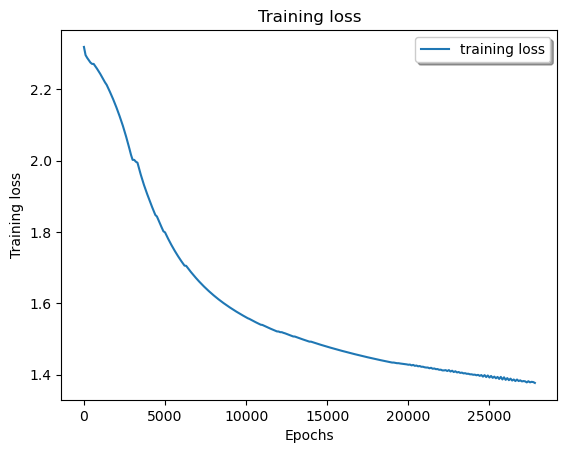

In [25]:
import matplotlib.pyplot as plt
x_loss=range(0,len(NN.loss)*100,100)


line1=plt.plot(x_loss,NN.loss,linestyle='-',label='training loss')  

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
legend = plt.legend(loc='best', shadow=True)

In [ ]:
x_training_accur=range(0,len(NN.trainingaccur)*100,100)
x_devaccur=range(0,len(NN.devaccur)*100,100)

line1=plt.plot(x_training_accur,NN.trainingaccur,linestyle='-',label='training accuracy') 
line2=plt.plot(x_devaccur,NN.devaccur,linestyle='-',label='dev accuracy')
                              
plt.title('Training and Dev Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
legend = plt.legend(loc='best', shadow=True)

In [ ]:
NN.dalpha1=(((np.dot(NN.Weights_H1_to_H2.T,NN.dz2))*(NN.deriv_alpha(NN.z1))))

In [ ]:
NN.dalpha6.shape

In [ ]:
 print(NN.alpha1,NN.dalpha1)
 print(NN.alpha2,NN.dalpha2)
 print(NN.alpha3,NN.dalpha3)
 print(NN.alpha4,NN.dalpha4)
 print(NN.alpha5,NN.dalpha5)
 print(NN.alpha6,NN.dalpha6)

In [ ]:
np.mean(NN.alpha1),np.std(NN.alpha1)

In [ ]:
np.mean(NN.dalpha1)

In [21]:
#### for serialising the neural network class ###
import pickle
import tensorflow as tf

In [22]:
model=NN

In [23]:
filename = "Copy_of_6_hidden_layer_NN_leaky_relu_instead_of_relu_(channel wise alpha)_.pkl"

In [24]:
with open(filename, 'wb') as file:
    pickle.dump(model, file)


In [ ]:
with open(filename, 'rb') as file:
    model = pickle.load(file)


In [ ]:
NN=model